In [1]:
%run flow_tools.py

In [2]:
folders = ['../data/20220505 - SN Compare/']

In [3]:
df = pd.concat([load_data(folder, colnames = ["WellName", "Receiver", "Sender",'Replicate'])
               for folder in folders], ignore_index=True)
df2 = clean_data(df)

Text(0.5, 17.640000000000043, 'log <channel>')

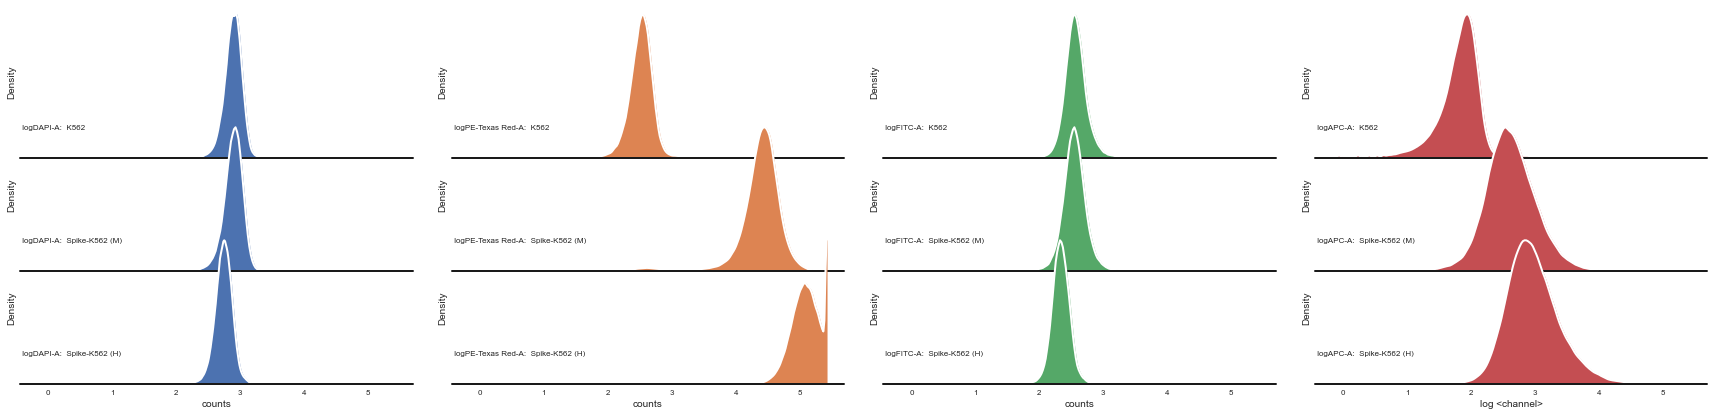

In [12]:
# To figure out what our cutoffs should be, let's look at the untransfected cells for all 4 channels:
# This plots each channel as a column of graphs, and each cell line per row
simplified_df = (df2.reset_index()
                 .melt(value_vars=['logDAPI-A','logPE-Texas Red-A','logFITC-A', 'logAPC-A'], 
                       id_vars=['index','WellName','Sender','Receiver'],
                       var_name='channel',
                       value_name='counts'))
g = sns.FacetGrid(data=simplified_df[(simplified_df["Receiver"].isin(['None']))], 
                  row = 'Sender', col='channel', hue='channel', sharey=False, aspect=3, height=2)
g.map(sns.kdeplot, "counts", shade=True, alpha=1, bw_adjust=0.9, clip_on=False, cut=0)
g.map(sns.kdeplot, "counts", color="w", lw=2, bw_adjust=.9, clip_on=False, cut=0)
g.map(plt.axhline, y=0, lw=2, color='k', clip_on=False)

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

for ax in g.axes.flat:
    wellname = ax.get_title().split("=")[2]
    ch = ax.get_title().split('|')[0].split('=')[1]
    ax.text(0,0.2, "{}: {}".format(wellname, ch), ha="left", va="center", 
            bbox=dict(facecolor='white', alpha=0.5), transform=ax.transAxes)
    ax.set(facecolor=(0, 0, 0, 0))

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
plt.xlabel("log <channel>")

Text(0.5, 17.64, 'log <channel>')

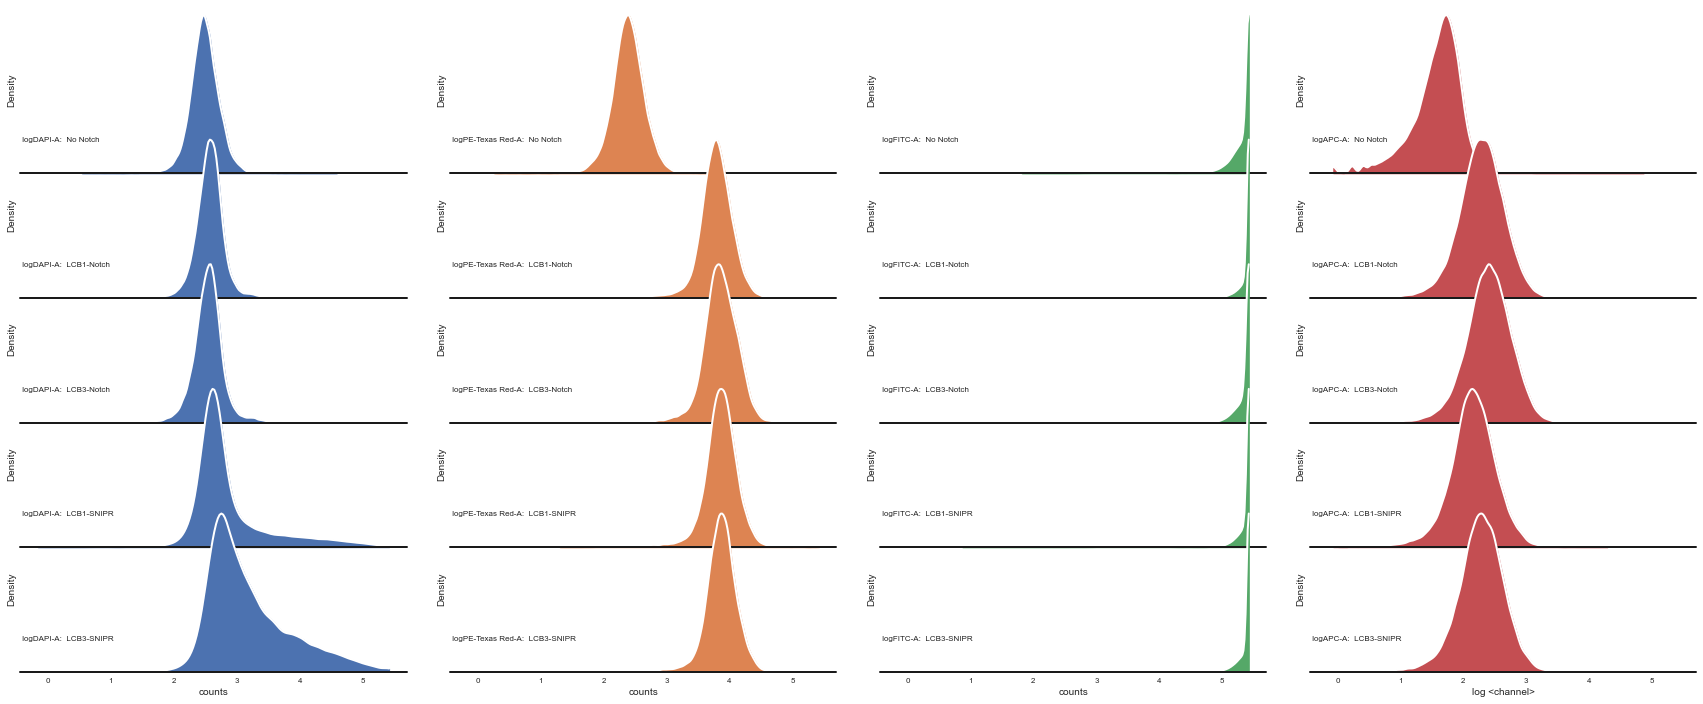

In [13]:
# To figure out what our cutoffs should be, let's look at the untransfected cells for all 4 channels:
# This plots each channel as a column of graphs, and each cell line per row
simplified_df = (df2.reset_index()
                 .melt(value_vars=['logDAPI-A','logPE-Texas Red-A','logFITC-A', 'logAPC-A'], 
                       id_vars=['index','WellName','Sender','Receiver'],
                       var_name='channel',
                       value_name='counts'))
g = sns.FacetGrid(data=simplified_df[(simplified_df["Sender"].isin(['None']))], 
                  row = 'Receiver', col='channel', hue='channel', sharey=False, aspect=3, height=2)
g.map(sns.kdeplot, "counts", shade=True, alpha=1, bw_adjust=0.9, clip_on=False, cut=0)
g.map(sns.kdeplot, "counts", color="w", lw=2, bw_adjust=.9, clip_on=False, cut=0)
g.map(plt.axhline, y=0, lw=2, color='k', clip_on=False)

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

for ax in g.axes.flat:
    wellname = ax.get_title().split("=")[2]
    ch = ax.get_title().split('|')[0].split('=')[1]
    ax.text(0,0.2, "{}: {}".format(wellname, ch), ha="left", va="center", 
            bbox=dict(facecolor='white', alpha=0.5), transform=ax.transAxes)
    ax.set(facecolor=(0, 0, 0, 0))

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
plt.xlabel("log <channel>")

In [10]:
expression_df = (df2[(df2['Receiver']=='None')]
                 .groupby(['Sender','Replicate'])['PE-Texas Red-A']
                 .mean()
                 .reset_index())

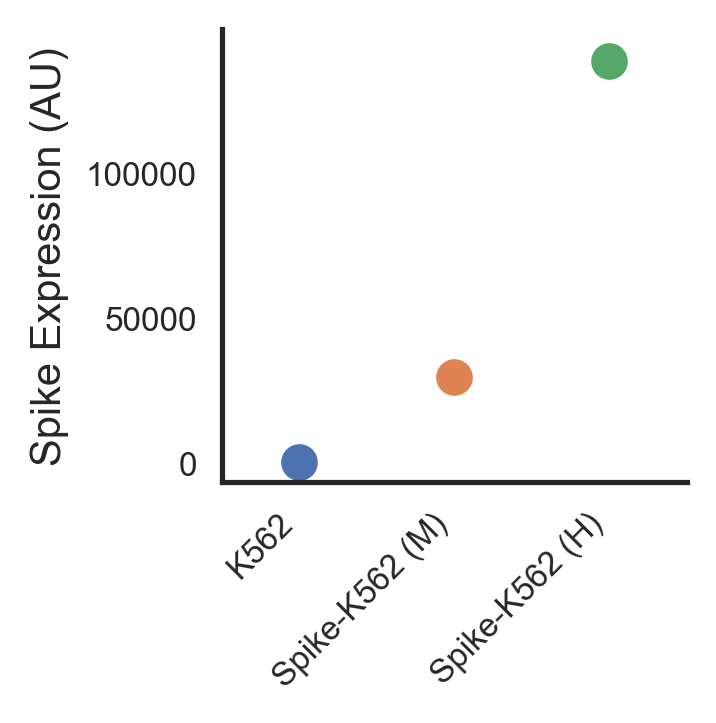

In [11]:
fig, ax = plt.subplots(1,1,figsize=(2,2), dpi=300)
g = sns.pointplot(data=expression_df, x='Sender', y='PE-Texas Red-A', hue='Sender', 
                  kind='point', join=False, 
                  order=['K562', 'Spike-K562 (M)', 'Spike-K562 (H)'],
                  hue_order=['K562', 'Spike-K562 (M)', 'Spike-K562 (H)'])
g.legend().remove()
g.set_ylabel('Spike Expression (AU)')
g.set_xlabel('')
plt.xticks(rotation=45, ha='right')
sns.despine()
plt.savefig(outputdir+'target-expression.eps', bbox_inches='tight')

In [13]:
df2[df2['Receiver'].isin(['None','No Notch','LCB1-Notch', 'LCB3-Notch'])].to_csv('notch_res.csv')

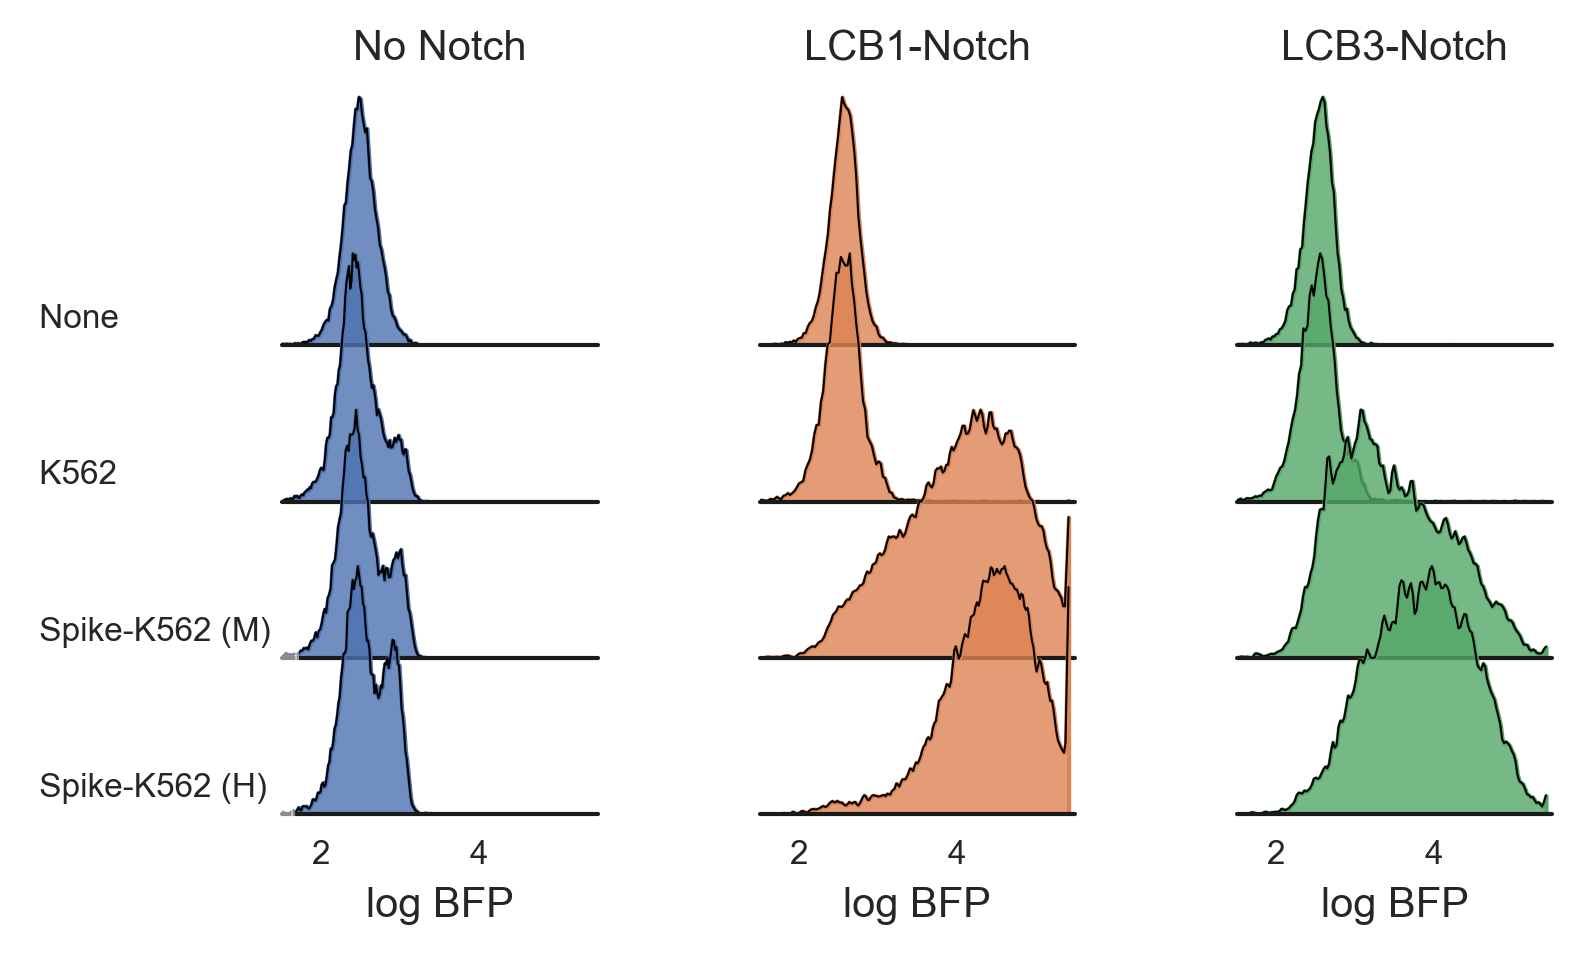

In [14]:
senders = ['None', 'K562', 'Spike-K562 (M)', 'Spike-K562 (H)']
notches = ['No Notch','LCB1-Notch', 'LCB3-Notch']
g = sns.FacetGrid(data=df2[(df2['Receiver'].isin(notches)) &
                           (df2['logFITC-A'] > 5)],
                  row='Sender', col='Receiver', sharey=False, aspect=2, height=0.8, 
                  hue='Receiver', row_order=senders, col_order=notches, hue_order=notches, xlim=[1.5, 5.5])
g.map(sns.kdeplot, "logDAPI-A", shade=True, alpha=0.8, bw_adjust=0.2, cut=0)
g.map(sns.kdeplot, "logDAPI-A", color="black", lw=0.5, bw_adjust=.2, cut=0)
g.map(plt.axhline, y=0, lw=1, color='k', clip_on=False)

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.4)

left_axes = [g.facet_axis(r, 0) for r in range(len(senders))]
for ax in left_axes:
    dose = ax.get_title().split("=")[1].split('|')[0]
    ax.text(-0.8,0.1, "{}".format(dose), ha="left", va="center", 
            bbox=dict(facecolor='white', alpha=0.5), transform=ax.transAxes)

g.set_titles("")
top_axes = [g.facet_axis(0,c) for c in range(len(notches))]
for ax, notch in zip(top_axes, notches):
    ax.set_title(notch)
[ax.set(facecolor=(0, 0, 0, 0)) for ax in g.axes.flat]

# Remove axes details that don't play well with overlap
g.set(yticks=[])
g.despine(bottom=True, left=True)
g.set_xlabels("log BFP")
g.set_ylabels('')
g.fig.set_dpi(300)